<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face='Helvetica' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [40]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'># code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [41]:
# you can write your code here
# split the data into train test cv
x, x_test, y, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)
X_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = 0.25, train_size = 0.75)

In [42]:
print('X_train shape: ', X_train.shape)
print('X_test shape:', x_test.shape)
print('X_cv shape: ', x_cv.shape)

X_train shape:  (3000, 5)
X_test shape: (1000, 5)
X_cv shape:  (1000, 5)


In [43]:
# fit RBF SVC to X_train data
clf = SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)

dual_coeff = clf.dual_coef_[0]
support_vectors = clf.support_vectors_

print('dual_coeff shape: ', dual_coeff.shape)
print('support_vectors: ', support_vectors.shape)


intercept = clf.intercept_
print('intercept: ', intercept)

# sv_indices = svc_clf.support_
# sv_dual_coeff = svc_clf.support_vectors_

dual_coeff shape:  (539,)
support_vectors:  (539, 5)
intercept:  [1.11810095]


In [44]:
def decision_function(X_cv):
    sample_output_rbf = 0
    y_predicted = []
    gamma = clf._gamma
    
    for x_q in X_cv:
        kernel_sum = 0
        for i in range(len(support_vectors)):
            squared_distance = (np.linalg.norm(support_vectors[i] - x_q)**2)
            rbf_k = np.exp(-gamma * (squared_distance))
            kernel_sum += dual_coeff[i] * rbf_k
        sample_output_rbf = kernel_sum + intercept
        y_predicted.append(sample_output_rbf[0])
    
    return np.array(y_predicted)

In [45]:
svm_decision_inbuilt_result_x_cv = clf.decision_function(x_cv)
# svm_decision_inbuilt_result_x_cv = clf.decision_function(x_test)
# svm_decision_inbuilt_result_x_test = clf.decision_function(x_test)
# print('x_test.shape x', svm_decision_inbuilt_result_x_test.shape)

print('inbuilt_decision_function: first 5 elements: ', svm_decision_inbuilt_result_x_cv[:5])

f_cv = decision_function(x_cv)
print('f_cv: first 5 elements:                      ', f_cv[:5])

inbuilt_decision_function: first 5 elements:  [-2.85046596  1.49379945  0.27452972 -1.95842413  1.48706226]
f_cv: first 5 elements:                       [-2.85046596  1.49379945  0.27452972 -1.95842413  1.48706226]


<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [46]:
# Randomly initializing weights (w) and intercept values (b)
# dim - size of the w vector we want (or number of features or parameters in this case)

def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias
        w :- weights, a numpy array
        b :- bias, a scalar
    '''
    # initialize the weights to zeros array of (1, dim) dimensions
    w = np.zeros_like(dim)
    # initialize bias to zero
    b = 0
    
    return w, b

In [47]:
def get_calibrated_prob(Y):
    n_positive = np.count_nonzero(Y)
    n_negative = len(Y) - n_positive
    calibrated_y_positive = (n_positive + 1) / (n_positive + 2)
    calibrated_y_negative = 1 / (n_negative + 2) 
    return calibrated_y_positive, calibrated_y_negative

In [48]:
y_plus, y_minus = get_calibrated_prob(y_train) # new y_cv
print("Calibrated_Y_positive(y_minus): ", y_plus)
print("Calibrated_Y_negative(y_minus): ", y_minus)

Calibrated_Y_positive(y_minus):  0.9989023051591658
Calibrated_Y_negative(y_minus):  0.00047778308647873863


In [49]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return 1.0/(1 + np.exp(-z))

In [50]:
def logloss(y_true, y_pred):
    sum = 0
    for i in range(len(y_true)):
        if (y_true[i] == 1):
            sum += (y_plus * np.log10(y_pred[i])) + ((1 - y_plus) * np.log10(1 - y_pred[i]))
        else:
            sum += (y_minus * np.log10(y_pred[i])) + ((1 - y_minus) * np.log10(1 - y_pred[i]))
    return -1 * (1 / len(y_true)) * sum

In [51]:
# make sure that the sigmoid function returns a scalar value, you can use dot function operation
def gradient_dw(x, y, w, b, alpha, N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x * (y - sigmoid(np.dot(w, x) + b) - (alpha / N) * w)
    return dw

In [52]:
#sb should be a scalar value
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    
    db = y - sigmoid(np.dot(w, x) + b)
    return db

In [53]:
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0):
    
    ''' In this function, we will implement logistic regression'''
        
    train_loss = []
    test_loss = []
    w, b = initialize_weights(X_train[0]) # Initialize the weights
    N = len(X_train)

    # write your code to perform SGD
    for i in range(epochs):
        train_pred = []
        test_pred = []
        for j in range(N):
            dw = gradient_dw(X_train[j], y_train[j], w, b, alpha, N)
            db = gradient_db(X_train[j], y_train[j], w, b)
            w = w + (eta0 * dw)
            b = b + (eta0 * db)
        
        for val in range(N):
            train_pred.append(sigmoid(np.dot(w, X_train[val]) + b))
        
        loss1 = logloss(y_train, train_pred)
        train_loss.append(loss1)
        
        for val in range(len(X_test)):
            test_pred.append(sigmoid(np.dot(w, X_test[val]) + b))
        
        loss2 = logloss(y_test, test_pred)
        test_loss.append(loss2)

    return w, b, train_loss, test_loss

In [54]:
alpha = 0.0001
eta0 = 0.0001
epochs = 50
optimized_w, optimized_b, cv_log_loss, test_log_loss = train(f_cv, y_cv, x_test, y_test, epochs, alpha, eta0)

print('optimized w: ', optimized_w)
print('optimized b: ', optimized_b)

optimized w:  1.2262837570003287
optimized b:  -0.08525159184597207


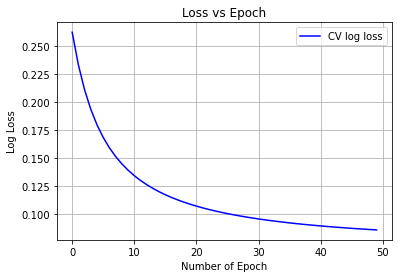

In [55]:
x = np.array([i for i in range(0, 50)])

cv_log_loss_arr = np.array(cv_log_loss)

plt.plot(x, cv_log_loss_arr, '-b', label = 'CV log loss')

plt.legend(loc='upper right')
plt.grid()

plt.xlabel('Number of Epoch')
plt.ylabel('Log Loss')

plt.title('Loss vs Epoch')
plt.show()

In [56]:
f_test = decision_function(x_test)
# print('Shape of custom_decision_function_result_x_test ', f_test.shape)

proba_arr_f_test = []

for i in f_test:
    i_proba = sigmoid(np.dot(optimized_w, i) + optimized_b)
    proba_arr_f_test.append(i_proba)

print('First 5 elements proba_arr_f_test: ', proba_arr_f_test[:5])

First 5 elements proba_arr_f_test:  [0.053030871084574355, 0.9071291556839961, 0.015782121110546242, 0.01384003352266687, 0.01843754180189938]
